<a href="https://colab.research.google.com/github/Pranab1234567/-ARIMA-Model-Airline-Dataset-/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels

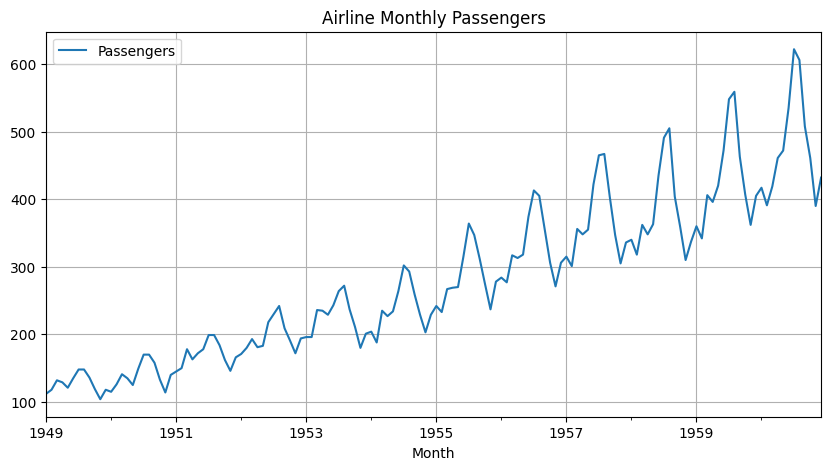

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
                 parse_dates=['Month'], index_col='Month')

df.plot(figsize=(10,5), title="Airline Monthly Passengers")
plt.grid()
plt.show()

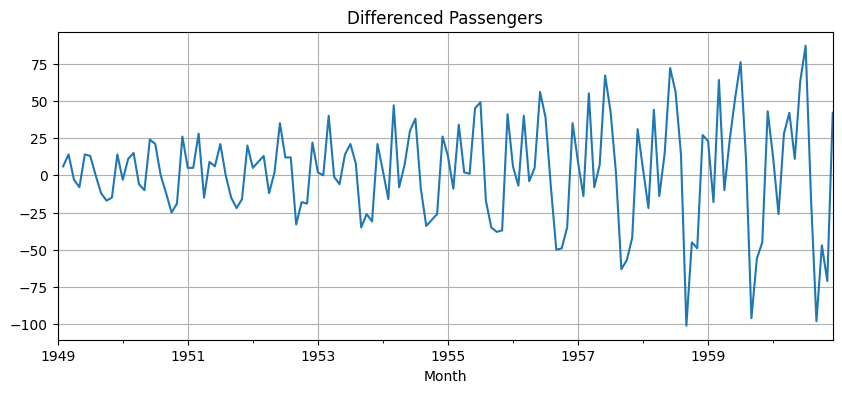

In [ ]:

df['Passengers_diff'] = df['Passengers'].diff().dropna()

df['Passengers_diff'].plot(figsize=(10,4), title="Differenced Passengers")
plt.grid()
plt.show()

In [ ]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Passengers_diff'].dropna())
print("📉 ADF p-value:", result[1])

📉 ADF p-value: 0.05421329028382478


In [ ]:

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Passengers'], order=(2,1,2))
result = model.fit()

print(result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 08 Aug 2025   AIC                           1353.347
Time:                        15:48:45   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.814      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = result.forecast(steps=12)
print("🔮 Forecasted Passengers:\n", forecast)

🔮 Forecasted Passengers:
 1961-01-01    439.854863
1961-02-01    465.296545
1961-03-01    500.666051
1961-04-01    535.971401
1961-05-01    561.689094
1961-06-01    571.312667
1961-07-01    562.972100
1961-08-01    539.729052
1961-09-01    508.528057
1961-10-01    478.147364
1961-11-01    456.747520
1961-12-01    449.697306
Freq: MS, Name: predicted_mean, dtype: float64


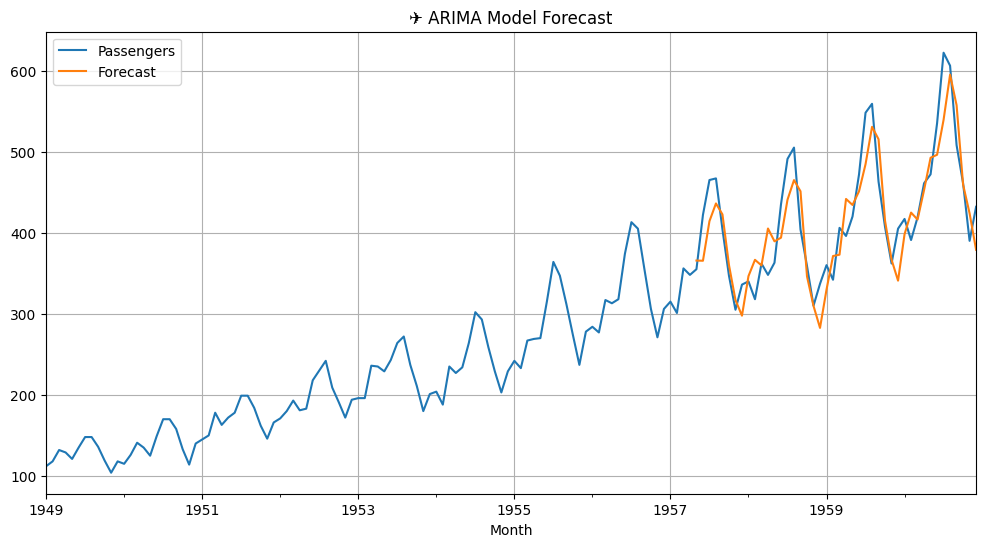

In [ ]:

df['Forecast'] = result.predict(start=100, end=143, dynamic=False)

df[['Passengers', 'Forecast']].plot(figsize=(12,6))
plt.title("✈️ ARIMA Model Forecast")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


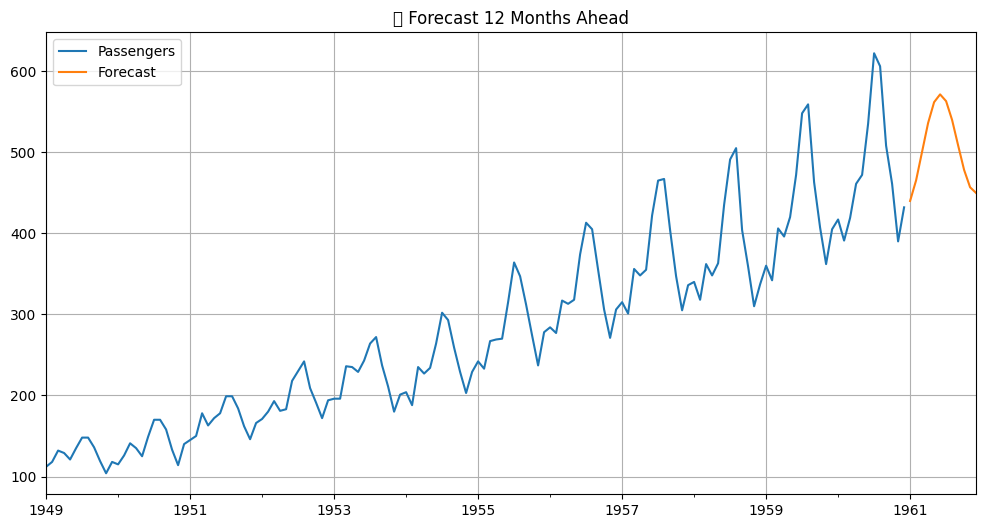

In [ ]:

future_forecast = result.get_forecast(steps=12)
future_index = pd.date_range(start='1961-01-01', periods=12, freq='MS')
future_df = pd.DataFrame({'Forecast': future_forecast.predicted_mean}, index=future_index)

pd.concat([df['Passengers'], future_df['Forecast']], axis=1).plot(figsize=(12,6))
plt.title("🔮 Forecast 12 Months Ahead")
plt.grid()
plt.show()